# Chapter: Multivariate Statistical Process Monitoring for Linear and Dynamic Processes

# Topic: DPCA model vs PCA model

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# utility functions
def augment(X, n_lags):
    """ generate augumented matrix with n_lags lagged measurements for each feature
    
    Parameters:
    ---------------------
    X: ndarray of shape (n_samples, n_features)
        n_samples is the number of samples and n_features is the number of features.
    
    n_lags: The number of lags to be used for data augumentation.   
    
    
    Returns:
    ---------------------
    X_aug: ndarray of shape (n_samples-n_lags, (n_lags+1)*n_features).
    
    """
    
    # augment training data
    N, m = X.shape
    X_aug = np.zeros((N-n_lags, (n_lags+1)*m))
    
    for sample in range(n_lags, N):
        XBlock = X[sample-n_lags:sample+1,:]
        X_aug[sample-n_lags,:] = np.reshape(XBlock, (1,-1), order = 'F')
        
    return X_aug

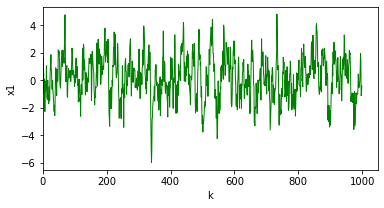

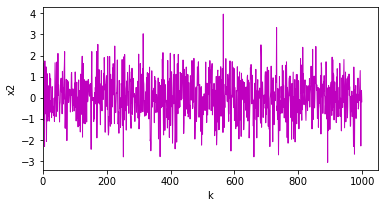

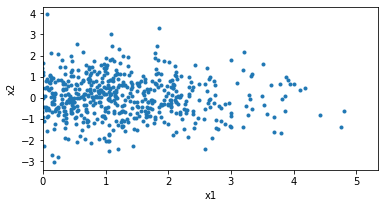

In [3]:
# generate data for the system: x1(k) = 0.8*x1(k-1) + x2(k-1)
np.random.seed(1)

N = 1000
x2 = np.random.normal(loc=0, scale=1, size=(N,1))
x1 = np.zeros((N,1))
for k in range(1,N):
    x1[k] = 0.8*x1[k-1] + x2[k-1]

X = np.hstack((x1, x2))
       
# plot 
plt.figure(figsize=(6,3))
plt.plot(x1, 'g', linewidth=1)
plt.ylabel('x1'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(6,3))
plt.plot(x2, 'm', linewidth=1)
plt.ylabel('x2'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(6,3))
plt.plot(x1, x2, '.', linewidth=1)
plt.ylabel('x2'), plt.xlabel('x1'), plt.xlim(0)

plt.show()

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#                             Fit PCA model
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# center data
X_centered = X - np.mean(X, axis=0)

# fit PCA model
pca = PCA()
pca.fit(X_centered)

# get singular values
print('PCA singular values:', pca.singular_values_)

# get singular vectors
print(pca.components_)

PCA singular values: [49.36093774 30.99088144]
[[-0.99934454  0.03620075]
 [ 0.03620075  0.99934454]]


In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#                             Fit DPCA model
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# augment data
X_aug = augment(X, 1)

# center data
X_aug_centered = X_aug - np.mean(X_aug, axis=0)

# fit DPCA model
dpca = PCA()
dpca.fit(X_aug_centered)

# get singular values
print('DPCA singular values:', dpca.singular_values_)

# get singular vectors
print(dpca.components_)

# get 4th singular vector
print('4th singular vector: ', dpca.components_[3,:])

DPCA singular values: [6.66412886e+01 3.73128968e+01 3.09445738e+01 1.16635701e-14]
[[-6.72672098e-01 -7.17609865e-01 -1.79472187e-01  1.83865100e-02]
 [-5.52129222e-01  3.24607992e-01  7.66311370e-01 -5.04961143e-02]
 [-1.55347358e-02  2.96285967e-02  4.20563853e-02  9.98554995e-01]
 [ 4.92365964e-01 -6.15457455e-01  6.15457455e-01  1.73472348e-17]]
4th singular vector:  [ 4.92365964e-01 -6.15457455e-01  6.15457455e-01  1.73472348e-17]
